# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 

We will be using stock data provided by Yahoo Finance.

## Get the Data

yfinance is a popular open source library developed by Ran Aroussi as a means to access the financial data available on Yahoo Finance.
yfinance, which is a Python package to download Yahoo Finance data

In [506]:
pip install yfinance


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [507]:

pip install pandas-datareader


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [577]:
import yfinance as yf
from pandas_datareader import data
import pandas as pd
import numpy as np
import datetime as dt

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.

In [603]:
yf.pdr_override()
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2024, 1, 29)
# end = dt.datetime.today()
BAC = data.get_data_yahoo('BAC', start, end)
BAC.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1276 entries, 2019-01-02 to 2024-01-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1276 non-null   float64
 1   High       1276 non-null   float64
 2   Low        1276 non-null   float64
 3   Close      1276 non-null   float64
 4   Adj Close  1276 non-null   float64
 5   Volume     1276 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.8 KB


In [604]:
BAC.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,24.080000,25.139999,24.010000,24.959999,21.945164,71836300
2019-01-03,24.940001,25.040001,24.450001,24.559999,21.593485,66599600
2019-01-04,25.100000,25.650000,25.030001,25.580000,22.490282,83829100
2019-01-07,25.559999,25.780001,25.290001,25.559999,22.472698,57016300
2019-01-08,25.719999,25.790001,25.090000,25.510000,22.428738,67339400


In [605]:
# CitiGroup
C = data.get_data_yahoo('C', start, end)
 
# Goldman Sachs
GS = data.get_data_yahoo('GS', start, end)
 
# JPMorgan Chase
JPM = data.get_data_yahoo('JPM', start, end)
 
# Morgan Stanley
MS = data.get_data_yahoo('MS', start, end)
 
# Wells Fargo
WF = data.get_data_yahoo('WFC', start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [606]:
# C.info()

In [607]:
# GS.info()

In [608]:
# JPM.info()

In [609]:
# MS.info()

In [610]:
# WF.info()

In [611]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. axis=1, since we are doing column wise concatenation**

In [612]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WF],axis=1,keys=tickers)
bank_stocks.head(5)

BAC                        ...        WFC                     
                 Open       High        Low  ...      Close  Adj Close    Volume
Date                                         ...                                
2019-01-02  24.080000  25.139999  24.010000  ...  46.939999  40.266796  20295200
2019-01-03  24.940001  25.040001  24.450001  ...  46.570000  39.949394  22262000
2019-01-04  25.100000  25.650000  25.030001  ...  47.950001  41.133209  23343600
2019-01-07  25.559999  25.780001  25.290001  ...  47.639999  40.867268  21858000
2019-01-08  25.719999  25.790001  25.090000  ...  47.540001  40.781490  19702900

[5 rows x 36 columns]

In [613]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head(5)

Bank Ticker        BAC                        ...        WFC                     
Stock Info        Open       High        Low  ...      Close  Adj Close    Volume
Date                                          ...                                
2019-01-02   24.080000  25.139999  24.010000  ...  46.939999  40.266796  20295200
2019-01-03   24.940001  25.040001  24.450001  ...  46.570000  39.949394  22262000
2019-01-04   25.100000  25.650000  25.030001  ...  47.950001  41.133209  23343600
2019-01-07   25.559999  25.780001  25.290001  ...  47.639999  40.867268  21858000
2019-01-08   25.719999  25.790001  25.090000  ...  47.540001  40.781490  19702900

[5 rows x 36 columns]

** Finding the max Close price for each bank's stock throughout the time period.**

In [614]:
# for tick in tickers:
#     print(tick, bank_stocks[tick]['Close'].max())

In [615]:
#or do this way
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     49.380001
C       81.910004
GS     423.850006
JPM    172.940002
MS     108.730003
WFC     59.060001
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time.

**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [616]:
returns = pd.DataFrame()

** Use pandas pct_change() method on the Close column to create a column in returns dataframe representing this return value.**

In [617]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.016026,-0.018121,-0.014649,-0.022153,-0.017822,-0.007882
2019-01-04,0.041531,0.048896,0.032682,0.036865,0.040827,0.029633
2019-01-07,-0.000782,0.008707,0.005541,0.000695,0.009927,-0.006465
2019-01-08,-0.001956,-0.002697,-0.003693,-0.001886,-0.006233,-0.002099


** The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it. ** 

In [618]:

import seaborn as sns

In [619]:
# sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns 
**

In [620]:
# returns.min()
# The argmin() method returns the index of the smallest element of an array. Date is an index in the returns dataframe.

In [621]:
# returns['C Return'].argmin()
# now argmin only returns the position of the index and not the index itself.

The idxmin() method returns a Series with the index of the minimum value for each column.

By specifying the column axis (axis='columns'), the idxmin() method returns a Series with the index of the minimum value for each row.

In [622]:
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

idxmax() to get the biggest single day gains.

In [623]:
# returns.max()

In [624]:
# print(returns.loc['2021-12-31'])

In [625]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

Though the crash began on 20 February, selling was intensified during the first half of March to mid-March. During the crash, there were multiple severe daily drops in the global stock market, the largest drop was on 16 March, nicknamed 'Black Monday II' of 12–13% in most global markets. There were two other significant dates of crashes in the stock markets, one being 9 March, nicknamed 'Black Monday I',[31][32][33] and on 12 March, nicknamed 'Black Thursday'. To deal with the panic, banks and reserves across the world cut their interest rates, bank rates and cash flow rates, as well as offering unprecedented support to investors and markets.
(Source:Wikipedia)

On 13 March, European stock markets closed mostly up while Asia-Pacific stock markets mostly closed down (except for the S&P/ASX 200 which rose by 4.4%)
Dow futures tumbled more than 1,000 points and Standard & Poor's 500 futures dropped 5%, triggering a circuit breaker.[310] On Monday 16 March, Asia-Pacific and European stock markets closed down, with the S&P/ASX 200 setting a one-day record fall of 9.7%, collapsing 30% from the peak that was reached on 20 February,[28][29][30] and the OMX Copenhagen 25, the OMX Tallinn, and OMX Vilnius on the Nasdaq Nordic exchanges all fell below 20 percent from their most recent peaks on 19 February in Copenhagen and on 21 February in Tallinn and Vilnius.[311][253] The Dow Jones Industrial Average, the NASDAQ Composite, and the S&P 500 all fell by 12–13%, with the Dow eclipsing the one-day drop record set on 12 March and the trading curb being activated at the beginning of trading for the third time (after 9 and 12 March).[312] Oil prices fell by 10%,[313] while the yields on 10-year and 30-year U.S. Treasury securities fell to 0.76% and 1.38% respectively (while their yield curve remained normal for the third straight trading session).

High levels of market volatility are associated with negative stock returns and high price risk premiums

In [626]:
returns.std()

BAC Return    0.022440
C Return      0.024423
GS Return     0.020554
JPM Return    0.020013
MS Return     0.022133
WFC Return    0.023828
dtype: float64

In [630]:
returns.loc['2024-01-01':'2024-12-31'].std()

BAC Return    0.011606
C Return      0.013126
GS Return     0.009525
JPM Return    0.007763
MS Return     0.014571
WFC Return    0.014701
dtype: float64

<Axes: xlabel='GS Return', ylabel='Count'>

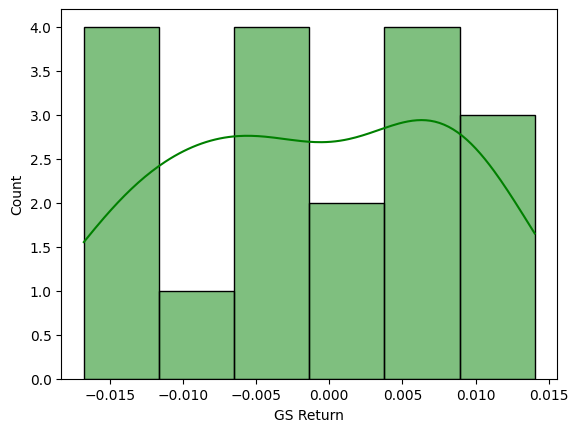

In [658]:
sns.histplot(returns.loc['2024-01-01':'2024-12-31']['GS Return'],color='green', kde=True)

In [659]:
# sns.displot(returns.loc['2024-01-01':'2024-12-31']['GS Return'], kind="kde")


<Axes: xlabel='JPM Return', ylabel='Count'>

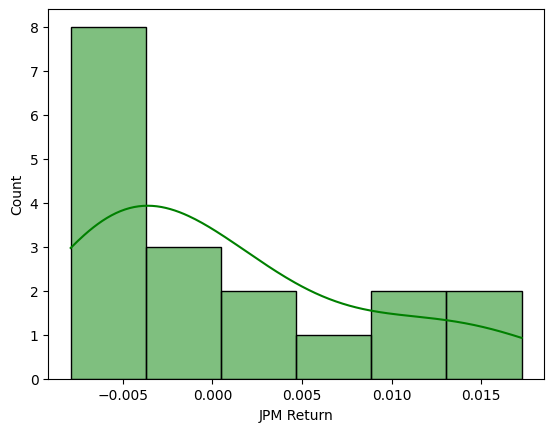

In [660]:
sns.histplot(returns.loc['2024-01-01':'2024-12-31']['JPM Return'],color='green', kde=True)

<Axes: xlabel='GS Return', ylabel='Count'>

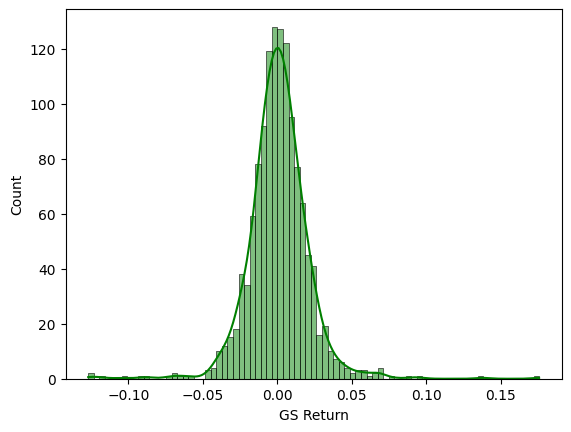

In [661]:
sns.histplot(returns['GS Return'],color='green', kde=True)

<Axes: xlabel='JPM Return', ylabel='Count'>

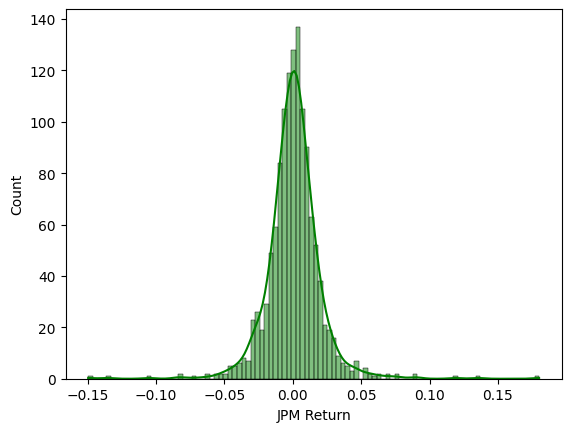

In [664]:
sns.histplot(returns['JPM Return'],color='green', kde=True)

<Axes: xlabel='C Return', ylabel='Count'>

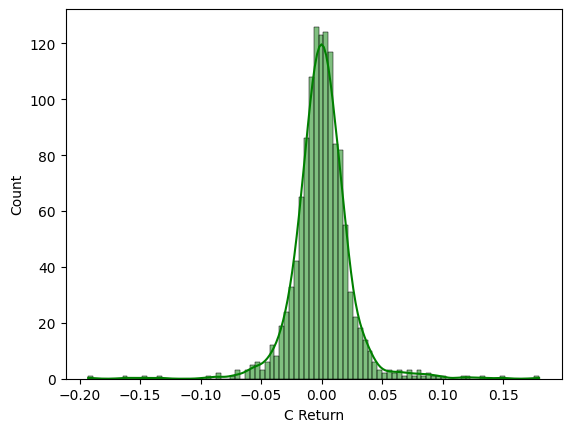

In [665]:
sns.histplot(returns['C Return'],color='green', kde=True)

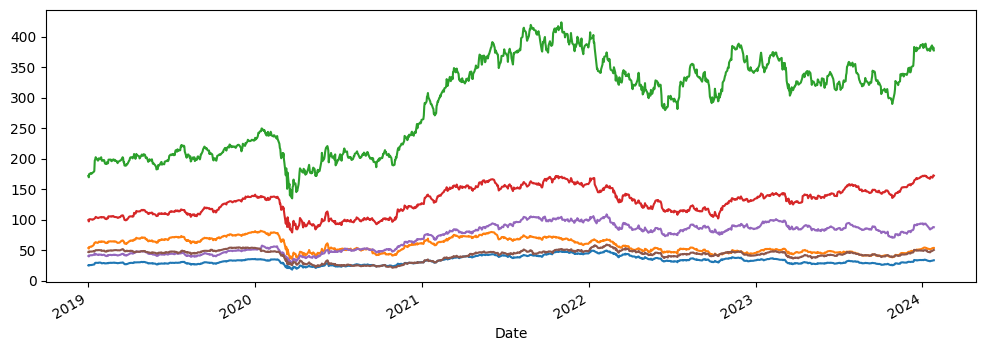

In [666]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
# plt.legend()